In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
FreqData=pd.read_csv("C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week6  Nerual Network/drive-download-20240314T111802Z-001 copy/freq_x.csv",index_col="ws")
# DataSet.drop(["Earthquake Magnitude","Hypocenter Depth (km)","Joyner-Boore Dist. (km)","Vs30 (m/s) selected for analysis","T0.010S","PGA (g)","PGV (cm/sec)","RSN"], axis=1, inplace=True)
# data_corr_mat= DataSet.corr()
# data_corr_mat

In [ ]:
DataSet=FreqData[["RSN1000"]]

In [ ]:
DataSet
DataSet.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
results = seasonal_decompose(DataSet , model='additive', period=1)
results.plot()

In [ ]:
DataSet.head()

In [ ]:
len(DataSet)

In [ ]:
train = DataSet.iloc[:156]
test = DataSet.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
DataSet.head(),DataSet.tail()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

In [ ]:
X.shape

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

In [ ]:
X.shape

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
# fit model
model.fit(generator,epochs=1000) #best possible is 200

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
import numpy as np
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
test.head()

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['RSN1000'],test['Predictions']))
print(rmse)

In [ ]:
model.save("C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week8/lstm1000.keras")

In [ ]:
from tensorflow import keras

model_new= keras.models.load_model("C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week8/lstm1000.keras")

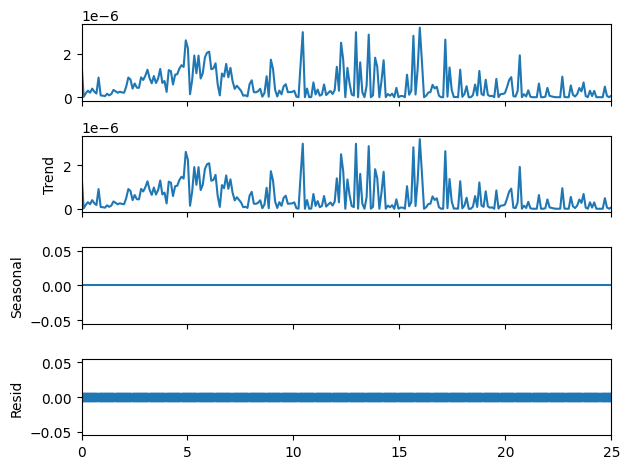

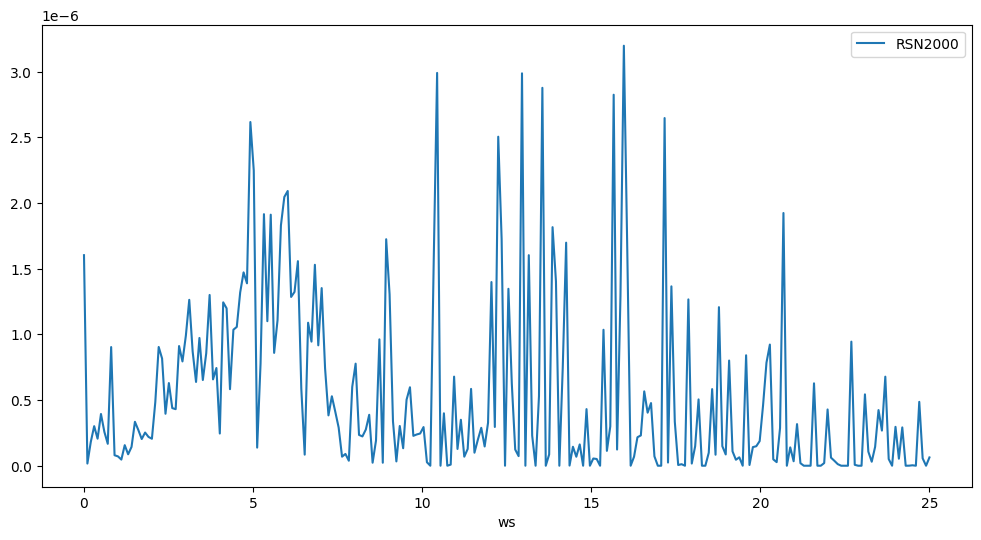

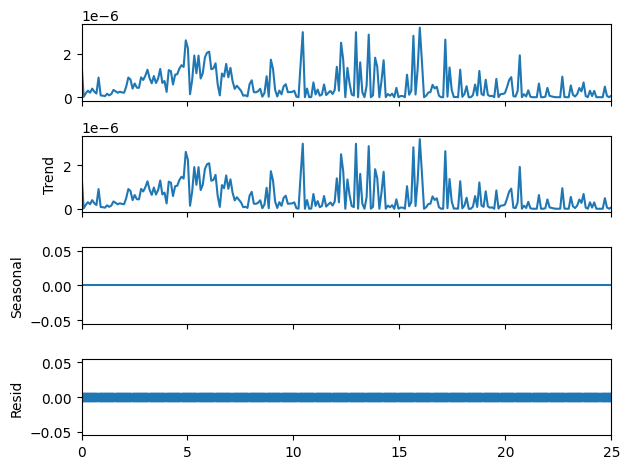

In [32]:
RSN="RSN2000"
new_dataset=FreqData[[RSN]]
new_dataset.plot(figsize=(12,6))
results= seasonal_decompose(new_dataset , model='additive', period=1)
results.plot()

In [33]:
train_new = new_dataset.iloc[:13]
test_new = new_dataset.iloc[13:]

In [34]:
new_scaler= MinMaxScaler()
new_scaler.fit(train_new)
scaled_train_new = new_scaler.transform(train_new)
scaled_test_new = new_scaler.transform(test_new)
# We do the same thing, but now instead for 12 months
# generator = TimeseriesGenerator(scaled_train_new, scaled_test_new, length=n_input, batch_size=1)

In [35]:
import numpy as np
test_predictions_new = []
n_input = 12
n_features=1

first_eval_batch_new = scaled_train_new[-n_input:]
current_batch_new = first_eval_batch_new.reshape((1, n_input, n_features))

for i in range(len(test_new)):
    
    # get the prediction value for the first batch
    current_pred_new = model_new.predict(current_batch_new)[0]
    
    # append the prediction into the array
    test_predictions_new.append(current_pred_new) 
    
    # use the prediction to update the batch and remove the first value
    current_batch_new = np.append(current_batch_new[:,1:,:],[[current_pred_new]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [36]:
test_predictions_new

[array([0.16716193], dtype=float32),
 array([0.3129884], dtype=float32),
 array([0.3935337], dtype=float32),
 array([0.17835473], dtype=float32),
 array([0.04330431], dtype=float32),
 array([0.01519154], dtype=float32),
 array([0.0276366], dtype=float32),
 array([0.07466628], dtype=float32),
 array([0.05703453], dtype=float32),
 array([0.00366928], dtype=float32),
 array([0.11580811], dtype=float32),
 array([0.09815434], dtype=float32),
 array([0.04229128], dtype=float32),
 array([0.05498266], dtype=float32),
 array([0.09045009], dtype=float32),
 array([0.34364486], dtype=float32),
 array([0.06892549], dtype=float32),
 array([0.06965178], dtype=float32),
 array([0.1258314], dtype=float32),
 array([0.22344139], dtype=float32),
 array([0.19061267], dtype=float32),
 array([0.1925263], dtype=float32),
 array([0.24347118], dtype=float32),
 array([0.08686021], dtype=float32),
 array([0.1452126], dtype=float32),
 array([0.14092456], dtype=float32),
 array([0.11979413], dtype=float32),
 array(

In [37]:
true_predictions_new = new_scaler.inverse_transform(test_predictions_new)
test_new['Predictions'] = true_predictions_new

C:\Users\adity\AppData\Local\Temp\ipykernel_2428\3549401995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_new['Predictions'] = true_predictions_new


<Axes: xlabel='ws'>

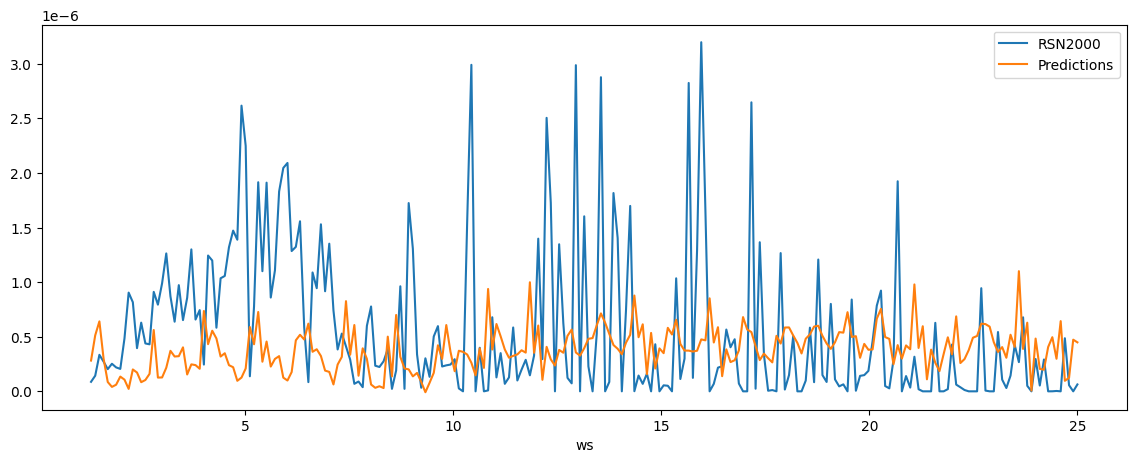

In [38]:
test_new.plot(figsize=(14,5))

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test_new[RSN],test_new['Predictions']))
print(rmse)

7.509714557574459e-07
